In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


Text(0, 0.5, 'Height')

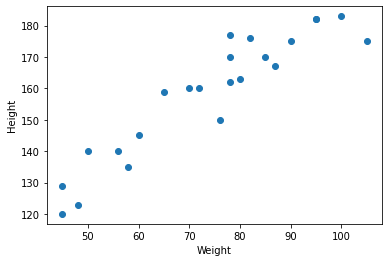

In [6]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
#correlation

#since we have highly positive correlation, linear regression will work well.
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


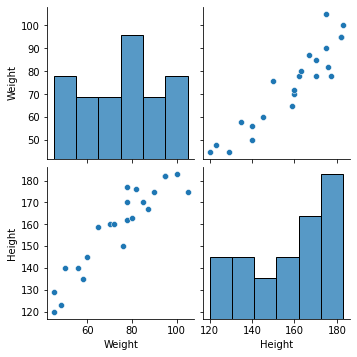

In [10]:
import seaborn as sns
sns.pairplot(df)

In [12]:
#independent and dependent feature

###independent feature should be a dataframe or a two dimensional array. 
###if you use only a single bracket, it will be a series.
X = df[['Weight']]
type(X)
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [13]:
###the dependent feature can be in series or 1 d array
y = df['Height']

In [14]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [16]:
### Train-test split: 25% data as test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [17]:
# standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
#appy linear regression
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
print("Coeff or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coeff or slope:  [17.2982057]
Intercept:  156.47058823529412


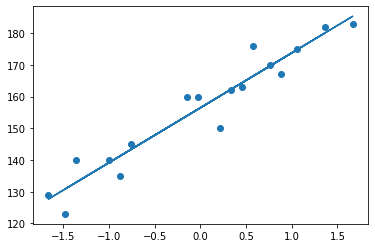

In [27]:
#plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [28]:
#prediction for test data
y_pred = regression.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [31]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(y_test, y_pred)  #r^2 value

In [35]:
print(score)

0.7360826717981276


In [38]:
!pip install statsmodels


   ---------------------------------------- 9.7/9.7 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 14.9/14.9 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
faiss-cpu 1.9.0 requires numpy<3.0,>=1.25.0, but you have numpy 1.24.4 which is incompatible.
paddlepaddle-gpu 2.3.2 requires protobuf<=3.20.0,>=3.1.0, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#ols based linear regression 
import statsmodels.api as sm

In [40]:
model = sm.OLS(y_train, X_train).fit()

In [41]:
model.predict(X_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 20 Jul 2025   Prob (F-statistic):                       0.664
Time:                        16:00:55   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Python 3.9.7\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [45]:
#prediction for new data
regression.predict([[72]])

#this gives a wrong or absurd answer because we missed transformation on input data

array([1401.94139895])